In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## Data Exploration

In [3]:
# Reading and Printing the dataset
df = pd.read_csv('/kaggle/input/california-housing-prices/housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
# The info() method prints information about the DataFrame
df.info()

# Here, we have some values missing in total_bedrooms variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# na stands for not a number
# inplace=True save the data in the dataframe

# This will only print the non null values
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


Defining the input variable and target/output variable as x and y.

In [6]:
x = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

In [7]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [8]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [10]:
# Combined data frame but only for the training data
train_data = x_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17680,-121.84,37.32,16.0,1866.0,364.0,1835.0,412.0,5.3363,<1H OCEAN,212800.0
5596,-118.24,33.80,28.0,636.0,169.0,788.0,143.0,3.6161,NEAR OCEAN,131300.0
3483,-118.45,34.30,35.0,4085.0,919.0,3988.0,906.0,3.4812,<1H OCEAN,160200.0
2803,-119.03,35.42,38.0,2952.0,598.0,1491.0,568.0,2.6094,INLAND,67900.0
16728,-120.71,35.50,12.0,3098.0,453.0,1433.0,434.0,5.2508,<1H OCEAN,292900.0
...,...,...,...,...,...,...,...,...,...,...
9504,-123.36,39.01,35.0,1551.0,321.0,857.0,288.0,2.7232,<1H OCEAN,115400.0
15268,-117.33,33.03,31.0,1171.0,321.0,603.0,267.0,2.8611,NEAR OCEAN,314300.0
13381,-117.61,34.12,17.0,6709.0,1198.0,3954.0,1161.0,4.6997,INLAND,156900.0
3300,-122.62,38.94,14.0,1731.0,400.0,638.0,282.0,2.3179,INLAND,57500.0


### Plotting the distribution of various features showing the correlation with the target feature.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

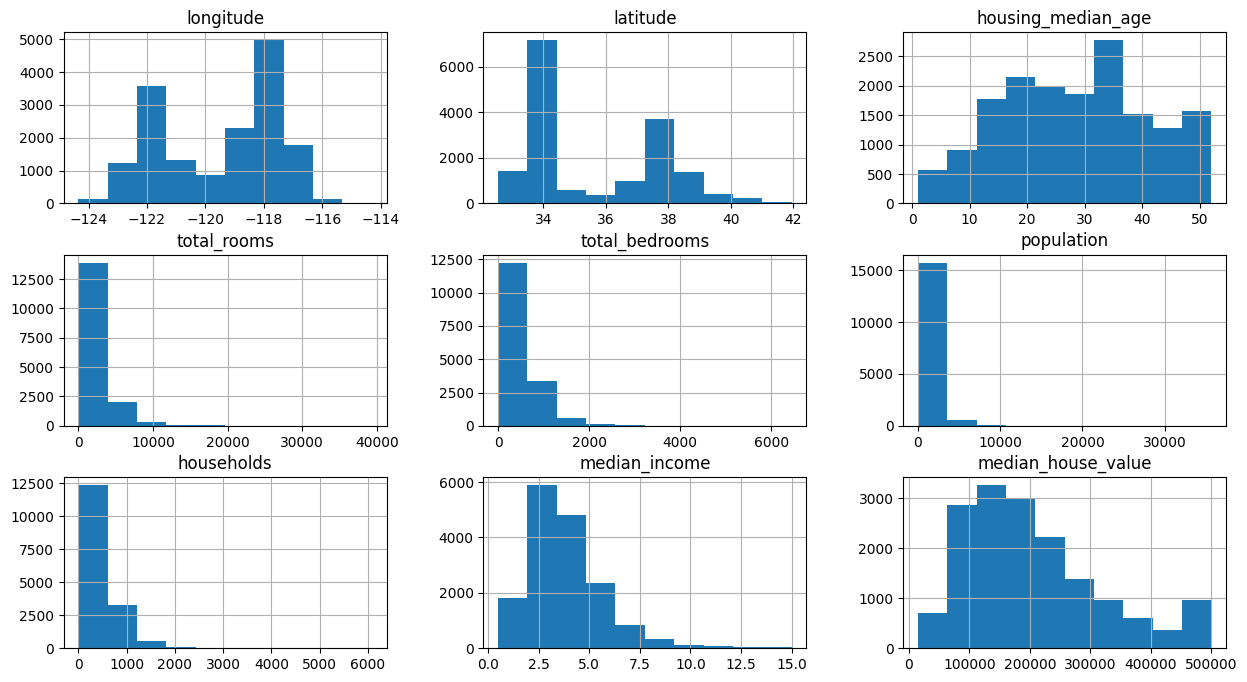

In [11]:
train_data.hist(figsize=(15, 8))

Correlation explains how one or more variable are related to each other.

In [12]:
# train_data_copy contains train_data without the ocean_proximity variable
train_data_copy = train_data.copy()

train_data_copy = train_data_copy.drop(columns=['ocean_proximity'])
train_data_copy.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924286,-0.109252,0.048179,0.070763,0.100167,0.056485,-0.014268,-0.044094
latitude,-0.924286,1.000000,0.008577,-0.039087,-0.068483,-0.110201,-0.072791,-0.080437,-0.145872
housing_median_age,-0.109252,0.008577,1.000000,-0.357060,-0.317152,-0.290034,-0.298995,-0.120994,0.105701
total_rooms,0.048179,-0.039087,-0.357060,1.000000,0.932143,0.851025,0.918115,0.194155,0.134540
total_bedrooms,0.070763,-0.068483,-0.317152,0.932143,1.000000,0.869696,0.978146,-0.007678,0.054090
population,0.100167,-0.110201,-0.290034,0.851025,0.869696,1.000000,0.901359,0.003789,-0.022784
households,0.056485,-0.072791,-0.298995,0.918115,0.978146,0.901359,1.000000,0.012071,0.069047
median_income,-0.014268,-0.080437,-0.120994,0.194155,-0.007678,0.003789,0.012071,1.000000,0.685882
median_house_value,-0.044094,-0.145872,0.105701,0.134540,0.054090,-0.022784,0.069047,0.685882,1.000000


### Heat map
A heat map represents these coefficients to visualize the strength of correlation among variables. It helps find features that are best for Machine Learning model building. The heat map transforms the correlation matrix into color coding.

### The correlation matrix
It shows how the variables are correlated to each other on a scale of -1 to 1, with 1 being a perfect positive correlation and -1 being a perfect inverse correlation.

<Axes: >

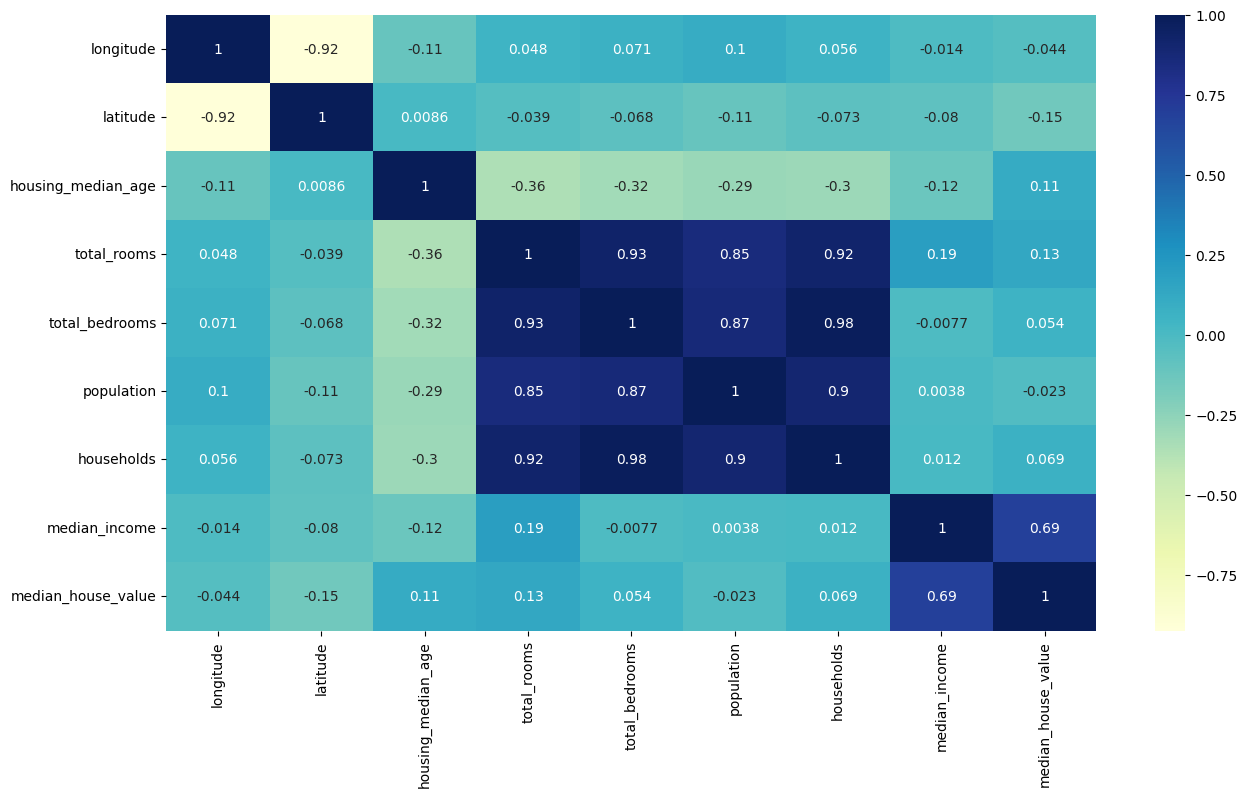

In [13]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data_copy.corr(), annot = True, cmap = 'YlGnBu')

## Data Preprocessing

In [14]:
# To make the histogram plot look more like a gaussian bell curve

train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

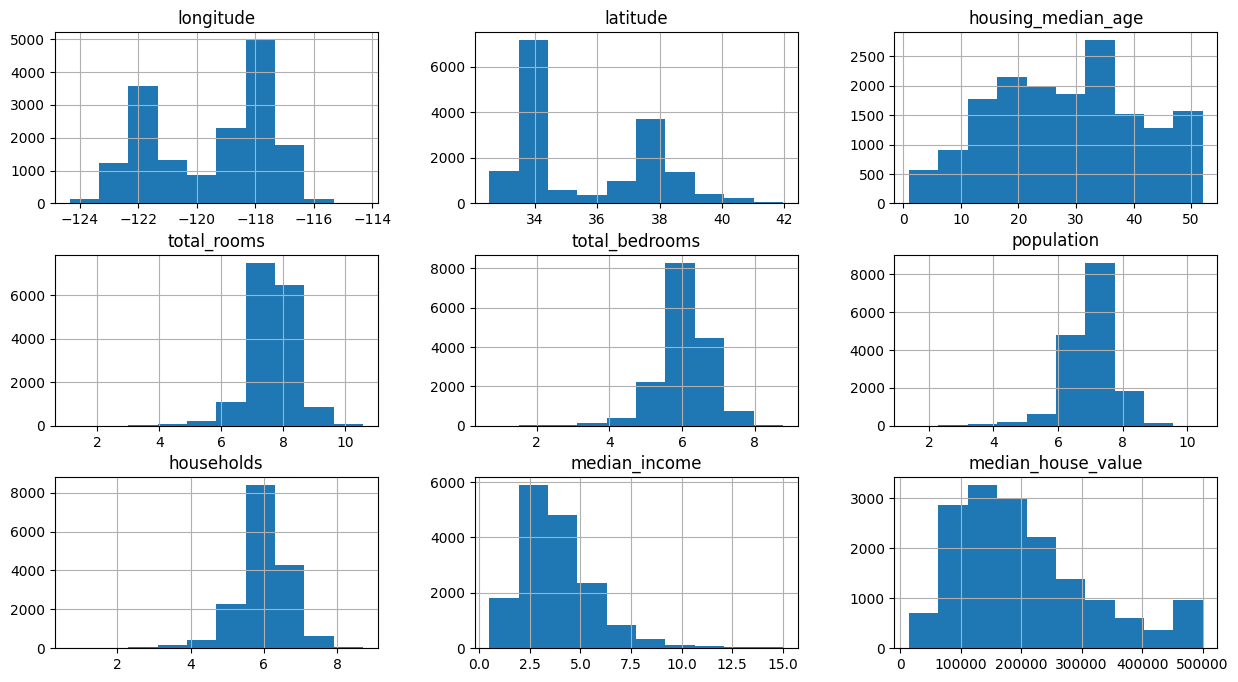

In [15]:
train_data.hist(figsize=(15, 8))

In [16]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7243
INLAND        5221
NEAR OCEAN    2090
NEAR BAY      1789
ISLAND           3
Name: count, dtype: int64

ocean_proximity is a very important feature but we cant use it if its a string. Therefore, we need to encode it into numbers. That's why we will do one-hot encoding which will create binary columns for each category.

In [17]:
train_data_encoded = pd.get_dummies(train_data.ocean_proximity).astype(int)
train_data_encoded

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17680,1,0,0,0,0
5596,0,0,0,0,1
3483,1,0,0,0,0
2803,0,1,0,0,0
16728,1,0,0,0,0
...,...,...,...,...,...
9504,1,0,0,0,0
15268,0,0,0,0,1
13381,0,1,0,0,0
3300,0,1,0,0,0


In [18]:
train_data = train_data.join(train_data_encoded).drop(['ocean_proximity'], axis=1)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17680,-121.84,37.32,16.0,7.532088,5.899897,7.515345,6.023448,5.3363,212800.0,1,0,0,0,0
5596,-118.24,33.80,28.0,6.456770,5.135798,6.670766,4.969813,3.6161,131300.0,0,0,0,0,1
3483,-118.45,34.30,35.0,8.315322,6.824374,8.291296,6.810142,3.4812,160200.0,1,0,0,0,0
2803,-119.03,35.42,38.0,7.990577,6.395262,7.307873,6.343880,2.6094,67900.0,0,1,0,0,0
16728,-120.71,35.50,12.0,8.038835,6.118097,7.268223,6.075346,5.2508,292900.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9504,-123.36,39.01,35.0,7.347300,5.774552,6.754604,5.666427,2.7232,115400.0,1,0,0,0,0
15268,-117.33,33.03,31.0,7.066467,5.774552,6.403574,5.590987,2.8611,314300.0,0,0,0,0,1
13381,-117.61,34.12,17.0,8.811354,7.089243,8.282736,7.057898,4.6997,156900.0,0,1,0,0,0
3300,-122.62,38.94,14.0,7.457032,5.993961,6.459904,5.645447,2.3179,57500.0,0,1,0,0,0


<Axes: >

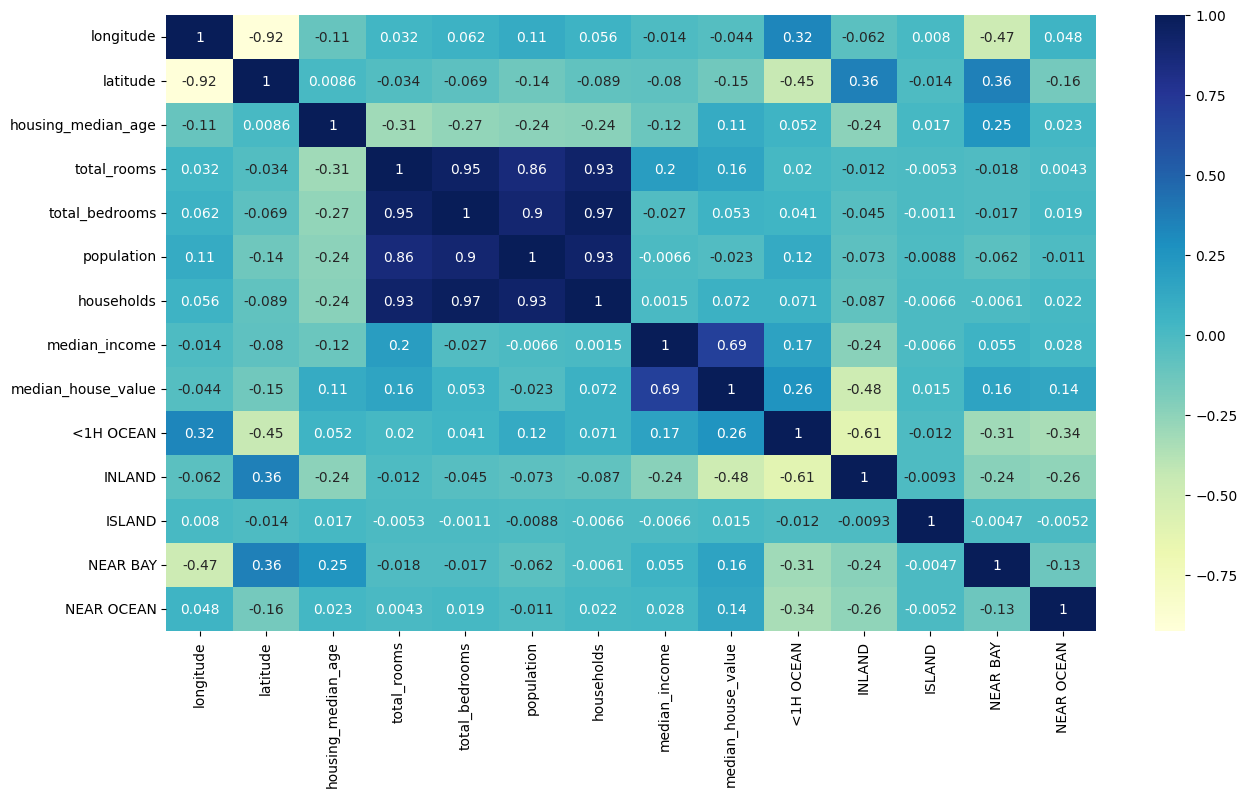

In [19]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot = True, cmap = 'YlGnBu')

##### Let's visulaize the coordinates

<Axes: xlabel='latitude', ylabel='longitude'>

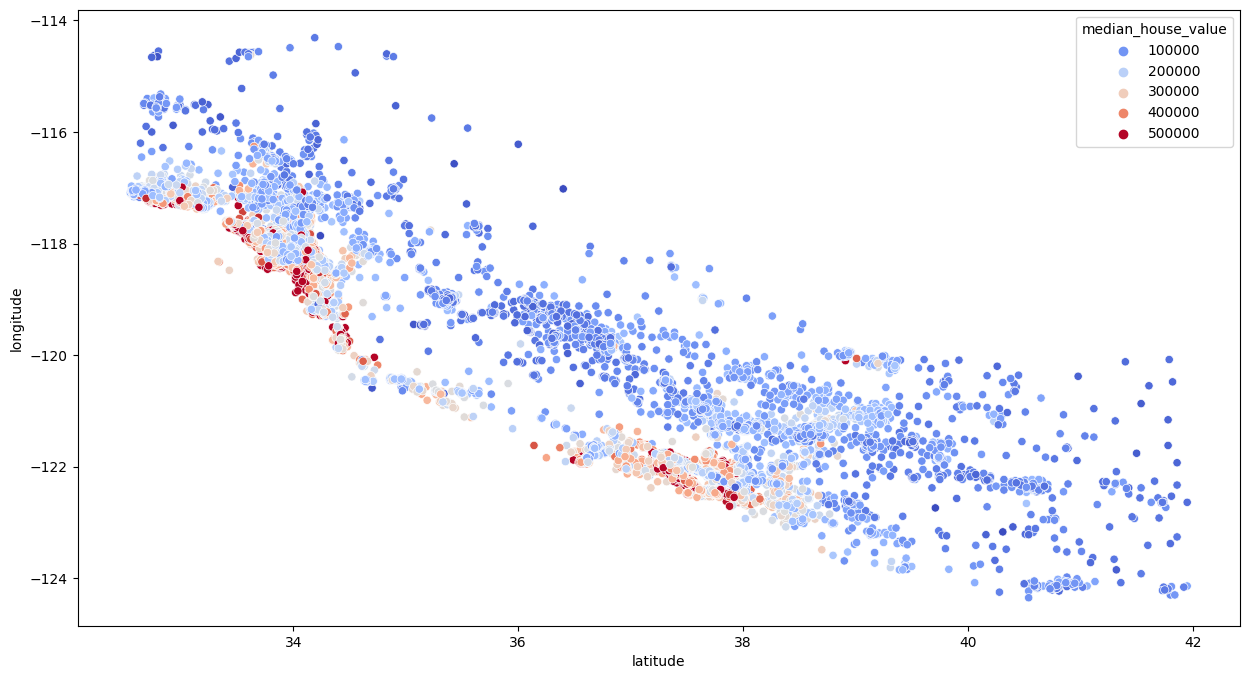

In [20]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='latitude', y='longitude', data = train_data, hue='median_house_value', palette='coolwarm')

### Feature Engineering
Feature Engineering is basically a set of techniques that enable us to create new features by combining or transforming the existing ones.

In [21]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

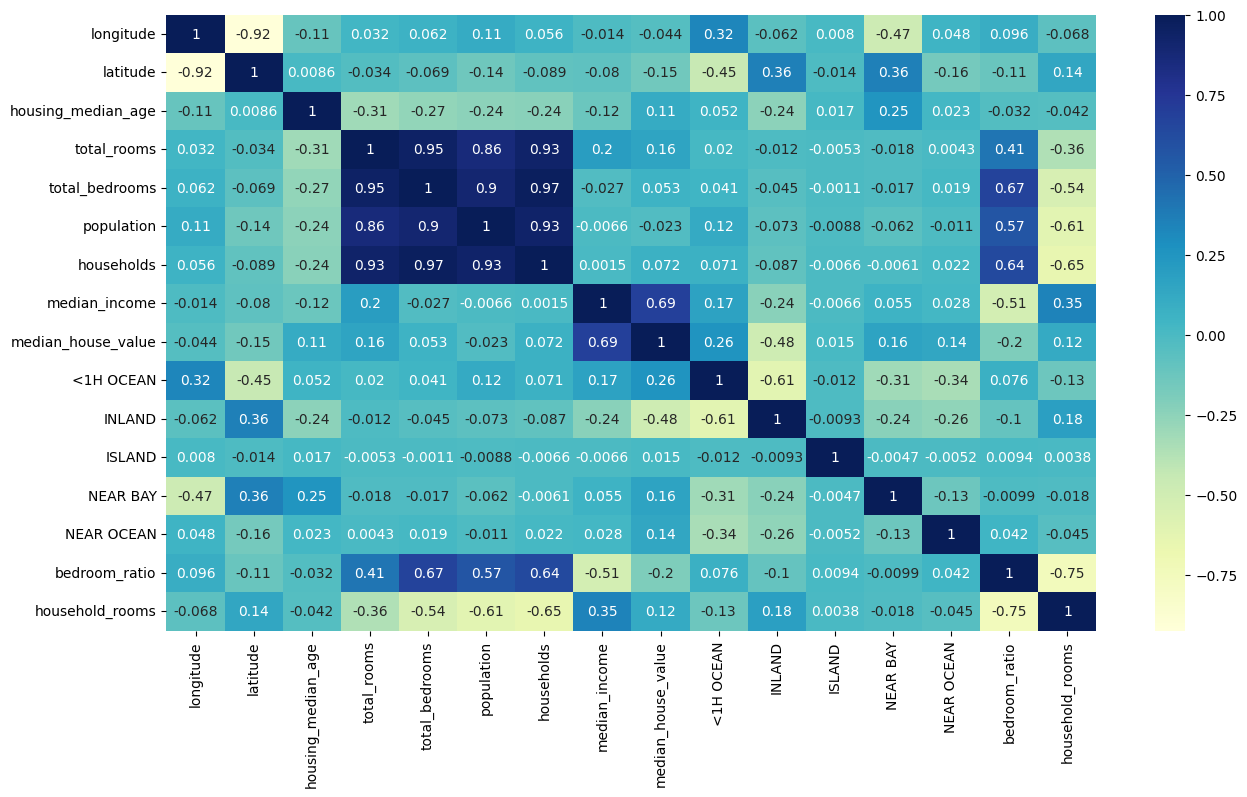

In [22]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

# Linear Regression model

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Feature Scaling
scaler = StandardScaler()

x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
x_train_s = scaler.fit_transform(x_train)

regressor = LinearRegression()
regressor.fit(x_train_s, y_train)

LinearRegression()

We have made many changes to x_train and y_train. Therefore, we need to make changes to x_test and y_test too.

In [25]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data_encoded = pd.get_dummies(test_data.ocean_proximity).astype(int)
test_data = test_data.join(test_data_encoded).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

#new_column_values = 0 
# We have added this column because test_data didnt have the ISLAND COLUMN
#column_number = 1
#test_data.insert(11, 'ISLAND', new_column_values)

test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
7622,-118.25,33.86,26.0,8.014005,6.167516,7.524561,6.115892,6.0531,186400.0,1,0,0,0,0,0.769592,1.310357
6576,-118.19,34.22,32.0,9.271153,7.316548,8.378850,7.301822,9.8413,500001.0,1,0,0,0,0,0.789173,1.269704
5088,-118.28,33.98,19.0,6.784457,5.749393,6.588926,5.627621,0.9809,121400.0,1,0,0,0,0,0.847436,1.205564
5051,-118.34,34.01,35.0,7.215240,5.886104,6.486161,5.834811,2.5568,312500.0,1,0,0,0,0,0.815788,1.236585
8112,-118.20,33.79,47.0,7.843849,6.440947,7.236339,6.408529,3.0135,192700.0,0,0,0,0,1,0.821146,1.223970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3641,-118.44,34.23,43.0,7.722235,6.063785,7.257708,6.093570,4.5278,181800.0,1,0,0,0,0,0.785237,1.267276
1082,-121.84,39.73,52.0,6.754604,5.451038,6.255750,5.293305,0.9870,112500.0,0,1,0,0,0,0.807011,1.276066
4283,-118.32,34.09,34.0,7.299121,6.516193,7.589336,6.483107,2.0557,225000.0,1,0,0,0,0,0.892737,1.125868
19814,-119.25,36.56,35.0,7.424165,5.924256,7.031741,5.758902,1.6722,59100.0,0,1,0,0,0,0.797969,1.289163


In [26]:
x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [27]:
x_test_s = scaler.transform(x_test)

In [28]:
regressor.score(x_test_s, y_test)

0.6855781955364003

In [29]:
y_pred = regressor.predict(x_test_s)

In [30]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

linear_mae = mean_absolute_error(y_test, y_pred)
linear_mse = mean_squared_error(y_test, y_pred)
linear_rmse = np.sqrt(linear_mse)
linear_r2 = r2_score(y_test, y_pred)

In [31]:
print("Linear Regression Metrics:")
print(f"MAE: {linear_mae:.2f}")
print(f"MSE: {linear_mse:.2f}")
print(f"RMSE: {linear_rmse:.2f}")
print(f"R-squared: {linear_r2:.2f}")

Linear Regression Metrics:
MAE: 47336.53
MSE: 4271255106.90
RMSE: 65354.84
R-squared: 0.69


# Random Forest Model

In [32]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

# Trainng the Random Forest Regressor model
forest.fit(x_train_s, y_train)

RandomForestRegressor()

In [33]:
forest.score(x_test_s, y_test)

0.830821444441796

## Hyperparameter Tuning
It is the process of systematically searching for the best combination of hyperparameters for a machine learning model. Hyperparameters are configuration settings for a model that are not learned from the data but are set prior to training.

### Grid Search Cross Validation
It is a technique used for hyperparameter tuning in machine learning models. It's a systematic method for searching for the best combination of hyperparameters for your model by evaluating it across different parameter values using cross-validation.

### Cross Validation
Cross Validation means we take the data and split it into k-folds (k=number)and we use all but one fold to train the data and one for the evaluation (10 folds -> 9 for training and 1 for evaluation)

### RandomizedSearchCV
It is an alternative to GridSearchCV for hyperparameter tuning in scikit-learn. It offers a more efficient way to explore the hyperparameter space compared to grid search, especially when the search space is large. Instead of exhaustively evaluating all possible combinations, RandomizedSearchCV randomly samples a specified number of hyperparameter combinations from the search space.

### Parameter Grid
Specify a dictionary where keys are hyperparameter names, and values are lists of values or ranges you want to search over.

We have used two hyperparameters here:

#### 1. n_estimators
It determines the number of decision trees (or estimators) to be used in the Random Forest ensemble. We can tune n_estimators to find the right balance between model performance and computational efficiency. 
#### 2. max_depth
It specifies the maximum depth or number of levels that a decision tree can have. It limits how deep the tree can grow during the construction process. We can tune the max_depth hyperparameter to find the right balance between model complexity and performance.
#### 3. min_samples_split
It specifies the minimum number of samples that must be present in a node before it is considered for further splitting. We can tune the min_samples_split hyperparameter to optimize the trade-off between model complexity and performance. Smaller values like 2 or 5 may lead to more complex, deeper trees, while larger values like 10 or 20 can result in shallower, simpler trees.

In [34]:
# GridSearchCV was taking so long
# That's why i used RandomizedSearchCV here

from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'min_samples_split': [2, 4],
    'max_depth':[None, 4, 8]
}

random_search = RandomizedSearchCV(forest, param_grid, n_iter = 10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state= 42, return_train_score=True)
# cv is cross validation
# scoring is the evaluation metric to optimize

random_search.fit(x_train_s, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 4, 8],
                                        'min_samples_split': [2, 4],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error')

In [35]:
best_forest = random_search.best_estimator_
best_forest

RandomForestRegressor(n_estimators=300)

In [36]:
best_forest.score(x_test_s, y_test)

0.8330505153963941

In [37]:
best_params = random_search.best_params_
best_params

{'n_estimators': 300, 'min_samples_split': 2, 'max_depth': None}

In [38]:
best_forest.score(x_test_s, y_test)
# This is same as the score before hyperparameter tuning.

0.8330505153963941

In [39]:
y_pred = best_forest.predict(x_test_s)

In [40]:
random_mae = mean_absolute_error(y_test, y_pred)
random_mse = mean_squared_error(y_test, y_pred)
random_rmse = np.sqrt(random_mse)
random_r2 = r2_score(y_test, y_pred)

In [41]:
print("Random Forest Regressor Metrics:")
print(f"MAE: {random_mae:.2f}")
print(f"MSE: {random_mse:.2f}")
print(f"RMSE: {random_rmse:.2f}")
print(f"R-squared: {random_r2:.2f}")

Random Forest Regressor Metrics:
MAE: 31284.12
MSE: 2267921081.12
RMSE: 47622.70
R-squared: 0.83


From the metrics we can conclude that Random forest regressor model with accuray 82% performs better than a linear regressor model with accuracy 69%.

# Support Vector Regression Model

In Support Vector Regression (SVR), the choice of kernel is an important decision that determines how the SVR model will capture the relationship between the input features and the target variable.

The kernel function defines the similarity measure between data points in the feature space. The most commonly used kernel in SVR is the Radial Basis Function (RBF) kernel, also known as the Gaussian kernel.

In [42]:
from sklearn.svm import SVR

svr = SVR(kernel = 'rbf')
svr.fit(x_train_s, y_train)

SVR()

In [43]:
svr.score(x_test_s, y_test)

-0.05456816174011103

### Tuning Hyperparameters

#### 1. kernel
This parameter specifies the kernel type to be used in SVR. We can include multiple kernel options like 'linear', 'rbf' (RBF kernel), and 'poly' (polynomial kernel) to consider different kernel functions during hyperparameter tuning.
#### 2. C
The regularization parameter C controls the trade-off between maximizing the margin (large C) and minimizing the prediction error (small C). It influences the margin width and model complexity.
#### 3. epsilon
The epsilon parameter ϵ determines the margin of tolerance around the predicted value within which no penalty is associated with the training data points. It influences the size of the margin.

In [44]:
param_dist = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 1],
    'kernel':['linear', 'rbf', 'poly']
}

random_search = RandomizedSearchCV(svr, param_dist, n_iter = 10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state= 42, return_train_score=True)

random_search.fit(x_train_s, y_train)

RandomizedSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10],
                                        'epsilon': [0.01, 0.1, 1],
                                        'kernel': ['linear', 'rbf', 'poly']},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error')

In [45]:
best_svr = random_search.best_estimator_
best_svr

SVR(C=10, epsilon=1, kernel='linear')

In [46]:
y_pred = best_svr.predict(x_test_s)

In [47]:
svr_mae = mean_absolute_error(y_test, y_pred)
svr_mse = mean_squared_error(y_test, y_pred)
svr_rmse = np.sqrt(svr_mse)
svr_r2 = r2_score(y_test, y_pred)

In [48]:
print("Support Vector Regressor Metrics:")
print(f"MAE: {svr_mae:.2f}")
print(f"MSE: {svr_mse:.2f}")
print(f"RMSE: {svr_rmse:.2f}")
print(f"R-squared: {svr_r2:.2f}")

Support Vector Regressor Metrics:
MAE: 54067.04
MSE: 6214953272.69
RMSE: 78834.97
R-squared: 0.54


After Hyperparameter tuning, The accuracy of SVR increased from -5% to +54%. But, it still did not perform better than linear regression and Random forest regressor model.

So, concluding the above comparision between the three models, Rnadom forest regressor performed the best with an accuracy of 83%. This model will predict the housing price better than comapred to the other two models.